# Assignement n.4

Collect the ABALONE Dataset from [here](https://archive.ics.uci.edu/ml/datasets/Abalone).

You"ll get 2 files:
   * abalone.data  : csv for the dataset
   * abalone.names : explanation and names of the attributes.
   
## GOALS:

  1. Provide basic data exploration results on the dataset
  2. Train a binary classifier on the Abalone dataset for the following target classes:
      * 0: young snail, number of rings <= 12
      * 1: old snail, number of rings > 12

### Notes:

  * Use 70-30 as train-test split
  * Try different classifiers and compare the results
  * Provide an evaluation of the classifier
  * *Optional* Tune the classifier"s hyperparameters
  * Comment with markdown cells everything you code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [2]:
initial_data = pd.read_csv("abalone.data", header=None)
initial_data.columns = ["sex", "length", "diam", "height", "whole", "shucked", "viscera", "shell", "rings"]

initial_data

,sex,length,diam,height,whole,shucked,viscera,shell,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Exploratory Data Analysis

In [3]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      4177 non-null   object 
 1   length   4177 non-null   float64
 2   diam     4177 non-null   float64
 3   height   4177 non-null   float64
 4   whole    4177 non-null   float64
 5   shucked  4177 non-null   float64
 6   viscera  4177 non-null   float64
 7   shell    4177 non-null   float64
 8   rings    4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
initial_data.describe()

,length,diam,height,whole,shucked,viscera,shell,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
initial_data.isna().sum() # No NA, life is beautiful

sex        0
length     0
diam       0
height     0
whole      0
shucked    0
viscera    0
shell      0
rings      0
dtype: int64

array([[<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'diam'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'whole'}>,
        <AxesSubplot:title={'center':'shucked'}>,
        <AxesSubplot:title={'center':'viscera'}>],
       [<AxesSubplot:title={'center':'shell'}>,
        <AxesSubplot:title={'center':'rings'}>, <AxesSubplot:>]],
      dtype=object)

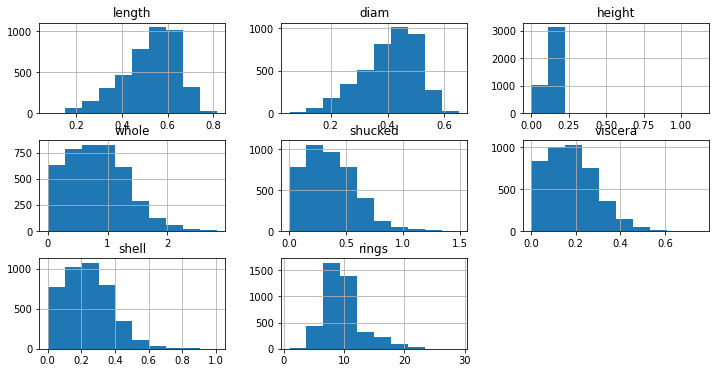

In [6]:
initial_data.hist(figsize=(12,6))

<AxesSubplot:>

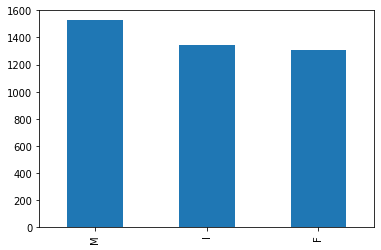

In [7]:
initial_data["sex"].value_counts().plot(kind="bar", figsize=(6,4))

# Data preprocessing

In [8]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

data = initial_data.copy()
ord_enc = OrdinalEncoder()
sex_enc = ord_enc.fit_transform(data[["sex"]])

#### See effect of ordinal encoding

In [9]:
for item in zip(np.unique(sex_enc), np.unique(data["sex"])):
    print(f"{item[1]} is encoded as {item[0]}")

F is encoded as 0.0
I is encoded as 1.0
M is encoded as 2.0


In [10]:
pd.DataFrame({"sex_enc": sex_enc[:,0], "sex": data["sex"]}).head()

,sex_enc,sex
0,2.0,M
1,2.0,M
2,0.0,F
3,2.0,M
4,1.0,I


In [11]:
data["sex"] = sex_enc

In [12]:
if "rings" in data.columns:
    data["young"] = np.where(data["rings"] <= 12, 1, 0)
    data = data.drop(columns="rings")

# Classification

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Perform train-test split

In [14]:
X = data.drop(columns="young").copy().values
y = data[["young"]].copy().values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

### SVC without scaling

In [15]:
clf_svc = SVC()
clf_svc.fit(X_train, y_train.reshape(-1))
pred = clf_svc.predict(X_test)
print("Classification report\n", classification_report(y_test, pred))
print("Confusion matrix\n", confusion_matrix(y_test, pred))
print("Accuracy\n", accuracy_score(pred, y_test))

Classification report
               precision    recall  f1-score   support

           0       0.86      0.09      0.17       193
           1       0.86      1.00      0.92      1061

    accuracy                           0.86      1254
   macro avg       0.86      0.55      0.55      1254
weighted avg       0.86      0.86      0.81      1254

Confusion matrix
 [[  18  175]
 [   3 1058]]
Accuracy
 0.8580542264752791


### SVC with standard scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [18]:
clf_svc = SVC()
clf_svc.fit(X_train_scaled, y_train.reshape(-1))
pred = clf_svc.predict(X_test_scaled)
print("Classification report\n", classification_report(y_test, pred))
print("Confusion matrix\n", confusion_matrix(y_test, pred))
print("Accuracy\n", accuracy_score(pred, y_test))

Classification report
               precision    recall  f1-score   support

           0       0.69      0.28      0.40       193
           1       0.88      0.98      0.93      1061

    accuracy                           0.87      1254
   macro avg       0.78      0.63      0.66      1254
weighted avg       0.85      0.87      0.85      1254

Confusion matrix
 [[  55  138]
 [  25 1036]]
Accuracy
 0.8700159489633174


### SVC with MinMax scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
clf_svc = SVC()
clf_svc.fit(X_train_scaled, y_train.reshape(-1))
pred = clf_svc.predict(X_test_scaled)
print("Classification report\n", classification_report(y_test, pred))
print("Confusion matrix\n", confusion_matrix(y_test, pred))
print("Accuracy\n", accuracy_score(pred, y_test))

Classification report
               precision    recall  f1-score   support

           0       0.78      0.16      0.27       193
           1       0.87      0.99      0.92      1061

    accuracy                           0.86      1254
   macro avg       0.82      0.58      0.60      1254
weighted avg       0.85      0.86      0.82      1254

Confusion matrix
 [[  31  162]
 [   9 1052]]
Accuracy
 0.8636363636363636


The standard scaler seems to perform best for SVC. Let's now implement cross validation.
## $k$-fold cross validation

In [22]:
from sklearn.model_selection import ShuffleSplit, cross_val_score,GridSearchCV

In [23]:
cv = ShuffleSplit(test_size=.3)
cv_scores = cross_val_score(clf_svc, X, y.ravel(), cv=cv)
print(cv_scores, cv_scores.mean())
cv_scores = cross_val_score(clf_svc, X, y.ravel(), cv=5)
print(cv_scores, cv_scores.mean())
cv_scores = cross_val_score(clf_svc, X, y.ravel(), cv=10)
print(cv_scores, cv_scores.mean())
clf_svc.get_params()

[0.8460925  0.83732057 0.83014354 0.83811802 0.84051037 0.83891547
 0.85007974 0.85406699 0.83891547 0.83253589] 0.84066985645933
[0.84808612 0.8361244  0.84670659 0.83952096 0.84431138] 0.8429498896942956
[0.8492823  0.85167464 0.83732057 0.83732057 0.85885167 0.85885167
 0.83971292 0.85611511 0.8441247  0.83693046] 0.8470184617855955


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Grid search SVC

In [55]:
param_grid = {
    'C': [100, 200, 300],
    'gamma': ['scale', 'auto'],
    'gamma': [100000, 20000, 10000],
    'kernel': ['linear']
}
grid = GridSearchCV(clf_svc, param_grid=param_grid, verbose=3, n_jobs=-1)
grid.fit(X_train_scaled, y_train.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 3/5] END .............C=100, gamma=100000, kernel=linear; total time=   0.2s
[CV 1/5] END .............C=100, gamma=100000, kernel=linear; total time=   0.2s
[CV 4/5] END .............C=100, gamma=100000, kernel=linear; total time=   0.2s
[CV 1/5] END ..............C=100, gamma=20000, kernel=linear; total time=   0.2s
[CV 2/5] END .............C=100, gamma=100000, kernel=linear; total time=   0.3s
[CV 5/5] END .............C=100, gamma=100000, kernel=linear; total time=   0.3s
[CV 2/5] END ..............C=100, gamma=20000, kernel=linear; total time=   0.3s
[CV 3/5] END ..............C=100, gamma=20000, kernel=linear; total time=   0.4s
[CV 4/5] END ..............C=100, gamma=20000, kernel=linear; total time=   0.2s
[CV 5/5] END ..............C=100, gamma=20000, kernel=linear; total time=   0.3s
[CV 3/5] END ..............C=100, gamma=10000, kernel=linear; total time=   0.3s
[CV 5/5] END ..............C=100, gamma=10000, ke

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [100, 200, 300], 'gamma': [100000, 20000, 10000],
                         'kernel': ['linear']},
             verbose=3)

In [56]:
grid.best_params_

{'C': 300, 'gamma': 100000, 'kernel': 'linear'}

In [70]:
grid_pred_svc = grid.predict(X_test_scaled)
print("Classification report\n", classification_report(y_test, grid_pred_svc))
print("Confusion matrix\n", confusion_matrix(y_test, grid_pred_svc))
print("Accuracy\n", accuracy_score(grid_pred_svc, y_test))

Classification report
               precision    recall  f1-score   support

           0       0.69      0.42      0.52       193
           1       0.90      0.97      0.93      1061

    accuracy                           0.88      1254
   macro avg       0.79      0.69      0.73      1254
weighted avg       0.87      0.88      0.87      1254

Confusion matrix
 [[  81  112]
 [  37 1024]]
Accuracy
 0.8811802232854864


We achieve 88.12% accuracy, which is the best we got so far.

## Random forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [72]:
pred_rf = clf_rf.predict(X_test)
print("Classification report\n", classification_report(y_test, pred_rf))
print("Confusion matrix\n", confusion_matrix(y_test, pred_rf))
print("Accuracy\n", accuracy_score(pred_rf, y_test))

Classification report
               precision    recall  f1-score   support

           0       0.60      0.44      0.50       193
           1       0.90      0.95      0.92      1061

    accuracy                           0.87      1254
   macro avg       0.75      0.69      0.71      1254
weighted avg       0.86      0.87      0.86      1254

Confusion matrix
 [[  84  109]
 [  56 1005]]
Accuracy
 0.868421052631579


## Grid search SVC

In [86]:
param_grid_rf = {'bootstrap': [True, False],
                 'max_depth': [10, 100],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1],
                 'min_samples_split': [4, 5, 6],
                 'n_estimators': [50, 100, 200]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf,
                    refit=True, verbose=3, n_jobs=-1)
grid_rf.fit(X_train, y_train.ravel())


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.8s[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [50, 100, 200]},
             verbose=3)

In [87]:
grid_rf.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [88]:
grid_pred_rf = clf_rf.predict(X_test)
print("Classification report\n", classification_report(y_test, grid_pred_rf))
print("Confusion matrix\n", confusion_matrix(y_test, grid_pred_rf))
print("Accuracy\n", accuracy_score(grid_pred_rf, y_test))

Classification report
               precision    recall  f1-score   support

           0       0.60      0.44      0.50       193
           1       0.90      0.95      0.92      1061

    accuracy                           0.87      1254
   macro avg       0.75      0.69      0.71      1254
weighted avg       0.86      0.87      0.86      1254

Confusion matrix
 [[  84  109]
 [  56 1005]]
Accuracy
 0.868421052631579


## Neural Networks?

In [90]:
import torch

In [91]:
X_train_ten, y_train_ten, X_test_ten, y_test_ten = map(
    torch.tensor, (X_train, y_train, X_test, y_test)
)


tensor([1, 1, 0,  ..., 1, 1, 1])